   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Mean Squared Error: 33805466.898688614
R-squared: 0.7694415927057693


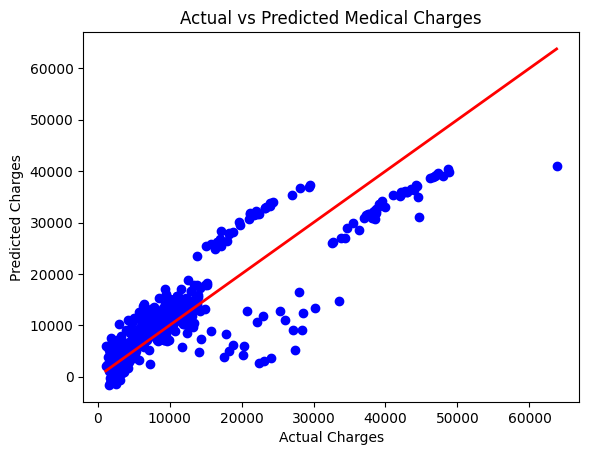

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('insurance.csv')

# Preview the dataset
print(df.head())

# Encode categorical variables (sex, smoker, region) into numerical values
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=["charges"])  # Features (independent variables)
y = df["charges"]  # Target (dependent variable: insurance charges)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()
